In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load your Iris CSV
df = pd.read_csv("Iris.csv")

# Drop the 'Id' column
df = df.drop("Id", axis=1)

# Encode the Species column
label_encoder = LabelEncoder()
df['Species_encoded'] = label_encoder.fit_transform(df['Species'])

# Set features and target
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species_encoded']
target_names = label_encoder.classes_

In [4]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [5]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation results
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


Accuracy: 0.93

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



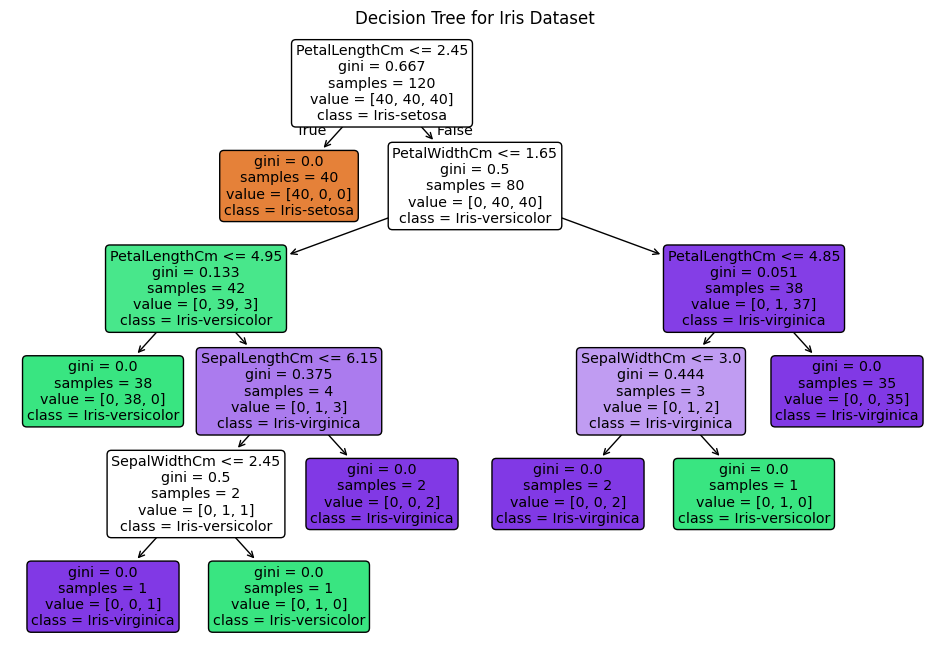

In [6]:
plt.figure(figsize=(12, 8))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=target_names,
    filled=True,
    rounded=True
)
plt.title("Decision Tree for Iris Dataset")
plt.show()


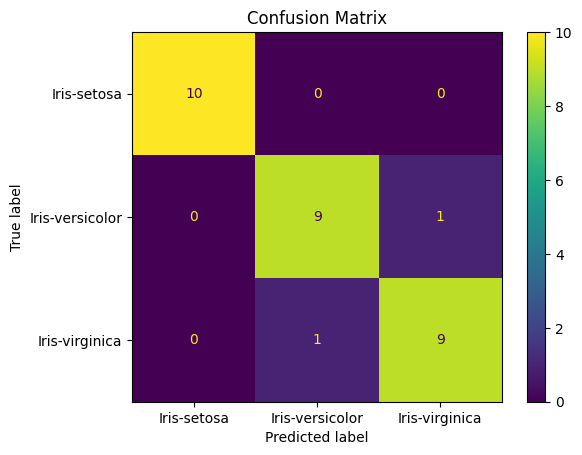

In [7]:
ConfusionMatrixDisplay.from_estimator(
    model, X_test, y_test, display_labels=target_names
)
plt.title("Confusion Matrix")
plt.show()
